In [1]:
#import custom classes from decision tree
from decisiontree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Classification Tree from Scratch

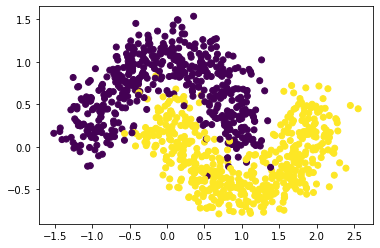

In [2]:
N= 1000
X,Y = make_moons(N, noise=0.2)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [3]:
Y = Y.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_1 <= 0.1980992914045237 ? 0.22657285440463154
 left:X_0 <= -0.5709115750286315 ? 0.1138534091322479
  left:0.0
  right:X_1 <= 0.00906354673958848 ? 0.018635371635351644
    left:X_1 <= -0.241446880478907 ? 0.002521341724280042
        left:1.0
        right:X_1 <= -0.24044328128122724 ? 0.018421705924443824
                left:0.0
                right:1.0
    right:X_0 <= 0.5021287462058672 ? 0.07213831478537364
        left:X_0 <= -0.47028373699802734 ? 0.02556610664718767
                left:0.0
                right:1.0
        right:X_0 <= 1.246736320823723 ? 0.4128178125470136
                left:0.0
                right:1.0
 right:X_0 <= 1.346166155833332 ? 0.12826431644497693
  left:X_1 <= 0.5912021716765472 ? 0.02413291316112029
    left:X_0 <= -0.30754481885711493 ? 0.07152243970142685
        left:0.0
        right:X_0 <= 0.4308198075947774 ? 0.4538210369363757
                left:1.0
                right:0.0
    right:X_1 <= 0.6788686956636527 ? 0.001512522374591471

In [4]:
#test
Y_pred = classifier.predict(X_test) 
print(f"Our implementation of tree from scratch reaches an accuracy of {accuracy_score(Y_test, Y_pred)*100}%")

Our implementation of tree from scratch reaches an accuracy of 97.5%


### Comparison with sklearn

In [5]:
#import sklearn implementation of classification tree with another name
from sklearn.tree import DecisionTreeClassifier as dtc

In [6]:
tree_sklearn = dtc(min_samples_split=3, max_depth=5)
tree_sklearn.fit(X_train, Y_train)
y_hat = tree_sklearn.predict(X_test)
print(f"With the same parameters, sklearn implementation has an accuracy of {accuracy_score(Y_test, y_hat)*100}%")

With the same parameters, sklearn implementation has an accuracy of 97.5%


# Regression Tree from Scratch

In [7]:
data = load_diabetes()
x = data.data
y = data.target
y = y.reshape(-1,1)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=41)

In [9]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=5)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_2 <= 0.00888341489852436 ? 1750.350965248149
 left:X_8 <= -0.0109044358473771 ? 845.2897357501961
  left:X_5 <= 0.108914381123697 ? 197.0922265602237
    left:X_2 <= -0.0105172024313319 ? 88.3194221759502
        left:X_6 <= 0.0228686348215404 ? 72.23103180680278
                left:71.0
                right:72.0
        right:X_8 <= -0.0236445575721341 ? 457.30235623661224
                left:81.0
                right:155.0
    right:253.0
  right:X_6 <= -0.0249926566315915 ? 509.1624098226407
    left:X_9 <= 0.0486275854775501 ? 511.7686687450955
        left:X_8 <= 0.0177634778671173 ? 419.7273716614636
                left:91.0
                right:292.0
        right:X_5 <= 0.0315667110616823 ? 4779.3375
                left:262.0
                right:120.0
    right:X_0 <= 0.0417084448844436 ? 356.0929555555563
        left:X_5 <= -0.0216685274425382 ? 722.0370489078828
                left:86.0
                right:109.0
        right:X_2 <= 0.00133873038135806 ? 852.04

In [10]:
y_hat = regressor.predict(X_test)
print(f"Our implementation of tree from scratch reaches a MSE of {mean_squared_error(Y_test, y_hat)}%")


Our implementation of tree from scratch reaches a MSE of 5861.820224719101%


### Comparison with sklearn

In [11]:
#import sklearn implementation of classification tree with another name
from sklearn.tree import DecisionTreeRegressor as dtr

In [12]:
tree_sklearn = dtr(min_samples_split=3, max_depth=5)
tree_sklearn.fit(X_train, Y_train)
y_hat = tree_sklearn.predict(X_test)
print(f"With the same parameters, sklearn implementation has a MSE of {mean_squared_error(Y_test, y_hat)}")

With the same parameters, sklearn implementation has a MSE of 4775.995002408541
